In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#data_path = os.path.join(os.getcwd(), 'scraped_data', 'SHIB-WETH', 'SHIB-WETH_2023-03-24_07-21-05.csv')
data_path = r'd:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\scraped_data\SHIB-WETH\SHIB-WETH_2023-03-24_07-21-05.csv'
df = pd.read_csv(data_path)

In [32]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1485 entries, 2023-03-24 07:00:23 to 2023-03-19 05:07:11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   buy_order      1485 non-null   bool   
 1   price_USD      1485 non-null   float64
 2   price_native   1485 non-null   float64
 3   amount_token   1485 non-null   float64
 4   total_native   1485 non-null   float64
 5   maker          1485 non-null   object 
 6   etherscan_url  1485 non-null   object 
dtypes: bool(1), float64(4), object(2)
memory usage: 82.7+ KB


,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
datetime,,,,,,,
2023-03-24 07:00:23,True,0.000011,5.952000e-10,164184.0,0.000098,0xdb...5195,https://etherscan.io/tx/0x49166e518adea4dda41b...
2023-03-24 06:38:47,True,0.000011,5.952000e-10,275446.0,0.001600,0xdb...92f2,https://etherscan.io/tx/0xa5c2a1c7e764b12478e4...
2023-03-24 06:36:23,False,0.000011,5.917000e-10,4770618.0,0.028200,0x64...2b0d,https://etherscan.io/tx/0x2df0b9818f2cf6df0c24...
2023-03-24 06:35:23,True,0.000011,5.953000e-10,459016.0,0.002700,0xdb...92f2,https://etherscan.io/tx/0x7dde7e8ea2257078e6c9...
2023-03-24 06:33:47,True,0.000011,5.953000e-10,44016.2,0.000026,0xb9...aa50,https://etherscan.io/tx/0xce7748a72a5ad5260708...
...,...,...,...,...,...,...,...
2023-03-19 05:16:47,True,0.000011,6.114000e-10,267346825.0,1.634760,0x19...eff0,https://etherscan.io/tx/0xd18a94606e97b6fef0a0...
2023-03-19 05:16:47,False,0.000011,6.053000e-10,625000.0,0.003700,0x87...1eae,https://etherscan.io/tx/0x348338b23735111118d7...
2023-03-19 05:16:47,False,0.000011,6.053000e-10,625000.0,0.003700,0x87...1eae,https://etherscan.io/tx/0x348338b23735111118d7...


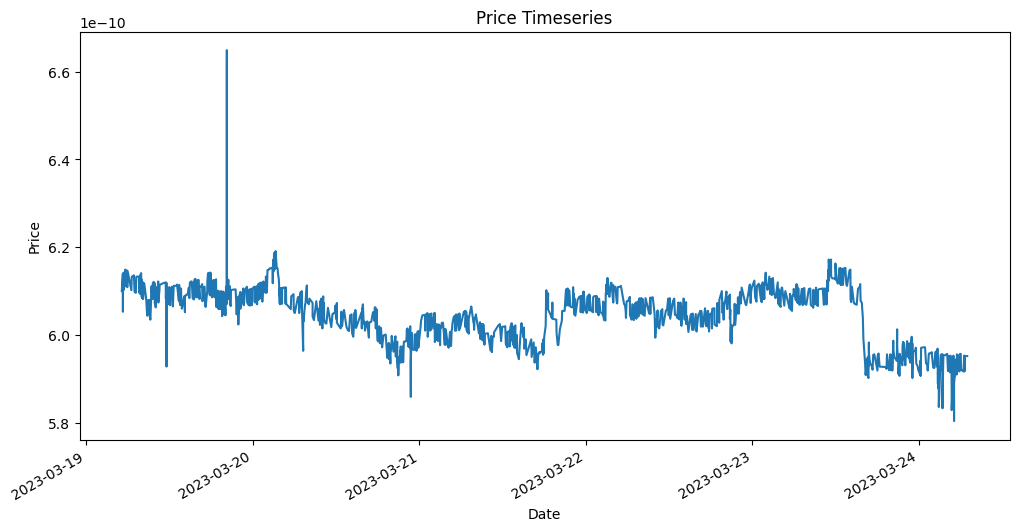

In [33]:
# Plot the price timeseries
df['price_native'].plot(figsize=(12, 6))
plt.title('Price Timeseries')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [34]:
df['returns'] = df['price_native'].pct_change()
df['log_returns'] = np.log(df['price_native']) - np.log(df['price_native'].shift(1))

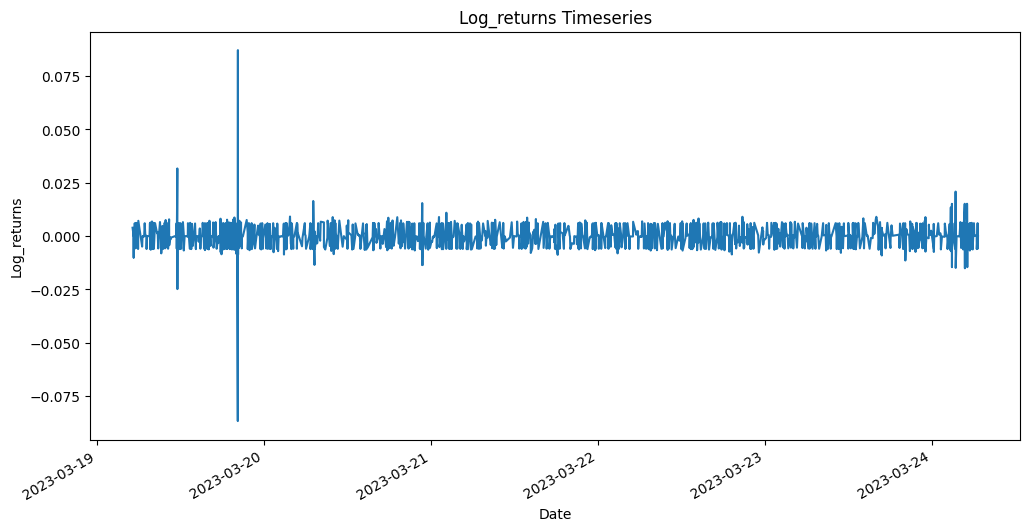

In [35]:
# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()

In [38]:
df.log_returns.describe()

count    1484.000000
mean        0.000017
std         0.005580
min        -0.086670
25%        -0.002946
50%         0.000000
75%         0.002387
max         0.087162
Name: log_returns, dtype: float64

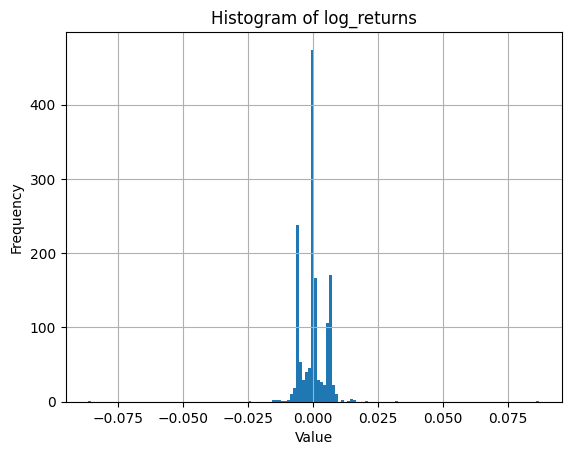

In [41]:
df['log_returns'].hist(bins = 150)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log_returns')

# display the plot
plt.show() #so far it seems quite ok, hopefully more data will result into something better